In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [3]:
import pandas as pd
import numpy as np

In [4]:
consolidated_df = pd.read_csv('../data/training_data.csv')

In [6]:
prediction_df = pd.read_csv('../data/prediction_data.csv')

In [6]:
consolidated_df

,player,number_of_not_outs,tot_runs,highest_score,tot_balls_faced,number_of_hundreds,number_of_fifties,number_of_fours,number_of_sixes,batting_average,...,max_number_of_wickets_per_match,number_of_balls_bowled,bowling_average,bowling_strike_rate,total_matches,total_innings,role,amount,player_origin,player_id
0,aaron finch,4.0,1094.0,74.0,820.0,0.0,8.0,104.0,46.0,22.791667,...,0.0,0.0,0.000000,0.000000,48.0,46.0,Batsman,44000000.0,Overseas,62c74dbf-5cad-4e02-9860-459c16cd55d4
1,abdul samad,4.0,222.0,33.0,152.0,0.0,0.0,12.0,14.0,9.652174,...,1.0,42.0,96.000000,42.000000,23.0,18.0,All-Rounder,2000000.0,Indian,b5f3235e-8afd-4f7d-9b98-514cecd1492e
2,abhishek sharma,6.0,241.0,46.0,173.0,0.0,0.0,17.0,12.0,10.954545,...,2.0,132.0,25.142857,18.857143,22.0,20.0,All-Rounder,5500000.0,Indian,5a28989f-9926-47cd-bc77-3ae5a51f627e
3,adam milne,2.0,23.0,15.0,29.0,0.0,0.0,0.0,1.0,2.875000,...,2.0,192.0,44.000000,27.428571,9.0,9.0,Bowler,32000000.0,Overseas,625af452-c08e-4cfa-b339-063fb791a4ee
4,adam zampa,0.0,5.0,5.0,8.0,0.0,0.0,1.0,0.0,0.454545,...,6.0,288.0,17.619048,13.714286,14.0,14.0,Bowler,3000000.0,Overseas,51b95e60-de99-4033-b1a5-6a9e09b921b6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,nathu singh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,24.0,15.000000,24.000000,2.0,2.0,Bowler,2000000.0,Indian,98a58235-019d-4c82-9367-8d7564df794a
238,oshane thomas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.0,60.0,15.800000,12.000000,4.0,4.0,Bowler,5000000.0,Overseas,809ca6a4-faf8-46db-b0fc-a0de634cbc56
239,riley meredith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,102.0,42.250000,25.500000,5.0,5.0,Bowler,80000000.0,Overseas,c230f1ff-b6ee-4268-b5f8-bc35cf3daa0c
240,sandeep warrier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,2.0,72.0,42.500000,36.000000,3.0,3.0,Bowler,1000000.0,Indian,f1ccc4cf-154c-4b34-9b1b-39ddad67e5c9


In [7]:
prediction_df

,player,number_of_not_outs,tot_runs,highest_score,tot_balls_faced,number_of_hundreds,number_of_fifties,number_of_fours,number_of_sixes,batting_average,...,number_of_five_fers,max_number_of_wickets_per_match,number_of_balls_bowled,bowling_average,bowling_strike_rate,total_matches,total_innings,role,player_origin,player_id
0,abdul samad,4.0,226.0,33.0,159.0,0.0,0.0,12.0,14.0,9.040000,...,0.0,1.0,42.0,96.000000,42.000000,25.0,20.0,Batsman,Indian,93335141-a765-494a-8387-1245fef6b9f4
1,abhijeet tomar,0.0,4.0,4.0,8.0,0.0,0.0,1.0,0.0,4.000000,...,0.0,0.0,0.0,0.000000,0.000000,1.0,1.0,Batsman,Indian,e6adfa03-e4a3-44d6-930f-20c97b0d3cb1
2,abhinav manohar,1.0,108.0,43.0,75.0,0.0,0.0,14.0,3.0,13.500000,...,0.0,0.0,0.0,0.000000,0.000000,8.0,7.0,Batsman,Indian,e478a101-08af-4ed0-a7e4-ead65c7765a9
3,abhishek sharma,6.0,667.0,75.0,493.0,0.0,2.0,64.0,25.0,18.527778,...,0.0,2.0,132.0,25.142857,18.857143,36.0,34.0,All-Rounder,Indian,e82a9d90-7b55-448f-80af-44813e0787f7
4,adam milne,2.0,23.0,15.0,29.0,0.0,0.0,0.0,1.0,2.875000,...,0.0,2.0,192.0,44.000000,27.428571,9.0,9.0,Bowler,Overseas,8924f594-fc8a-448b-bec0-3a93fa7f8014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,jason behrendorff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,2.0,114.0,33.000000,22.800000,5.0,5.0,Bowler,Overseas,768c90ab-bddf-45d7-8df7-10c4f689b96a
169,kuldeep sen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,4.0,151.0,29.625000,18.875000,7.0,7.0,Bowler,Indian,d57b2d09-840f-446b-8b92-bef5d2f2015b
170,prashant solanki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,2.0,36.0,19.000000,18.000000,2.0,2.0,Bowler,Indian,b0ab22cc-5ecb-4cd9-bd49-d74e06c6a54c
171,riley meredith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,2.0,270.0,33.750000,22.500000,13.0,13.0,Bowler,Overseas,dfec0a61-a598-4583-a522-ba29fb4529f2


In [10]:
categorical = [
    'role',
    'player_origin'
]

numerical = [
    'tot_runs',
    'highest_score',
    'number_of_hundreds',
    'number_of_fifties',
    'number_of_fours',
    'number_of_sixes',
    'batting_average',
    'batting_strike_rate',
    'wickets',
    'number_of_four_fers',
    'number_of_five_fers',
    'max_number_of_wickets_per_match',
    'bowling_average',
    'bowling_strike_rate',
    'total_matches',
]

target = 'amount'

In [13]:
consolidated_df[categorical] = consolidated_df[categorical].astype('str')

In [14]:
consolidated_df[categorical].dtypes

role             object
player_origin    object
dtype: object

In [15]:
train_dicts = consolidated_df[categorical + numerical].to_dict(orient='records')

In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [17]:
consolidated_df[target] = consolidated_df[target] / 10000000

In [18]:
y_train = consolidated_df[target].values

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = lr.predict(X_train)

In [37]:
list(y_pred)[0]

3.5050523166532983

In [38]:
list(y_train)[0]

4.4

In [39]:
mean_squared_error(y_train, y_pred, squared=False)

2.3944941320726714

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

/Users/amoghkulkarni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amoghkulkarni/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


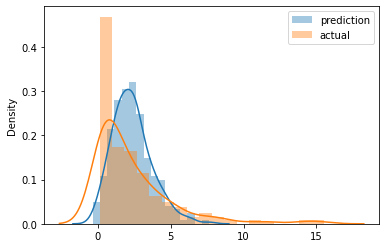

In [40]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train, df_val = train_test_split(consolidated_df, test_size=0.2, random_state=1)

In [43]:
df_train.shape

(193, 26)

In [45]:
df_test.shape

(49, 26)

In [22]:
dv = DictVectorizer()

In [23]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [24]:
X_train = dv.fit_transform(train_dicts)

In [25]:
y_train = df_train[target].values

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
def prepare_training_and_validation_data(df_train, df_val):
    categorical = [
        'role',
        'player_origin'
    ]

    numerical = [
        'tot_runs',
        'highest_score',
        'number_of_hundreds',
        'number_of_fifties',
        'number_of_fours',
        'number_of_sixes',
        'batting_average',
        'batting_strike_rate',
        'wickets',
        'number_of_four_fers',
        'number_of_five_fers',
        'max_number_of_wickets_per_match',
        'bowling_average',
        'bowling_strike_rate',
        'total_matches',
    ]

    target = 'amount'
    
    dv = DictVectorizer()
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)
    
    y_train = df_train[target].values
    
    val_dicts = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)
    
    y_val = df_val[target].values
    
    return {
        'X_train': X_train,
        'y_train': y_train,
        'X_val': X_val,
        'y_val': y_val
    }

In [30]:
train_val_dict = prepare_training_and_validation_data(df_train, df_val)

In [17]:
lr = LinearRegression()
lr.fit(train_val_dict['X_train'], train_val_dict['y_train'])

LinearRegression()

In [18]:
y_preds = lr.predict(train_val_dict['X_val'])

In [19]:
mean_squared_error(y_preds, train_val_dict['y_val'], squared=False)

2.9922809626985636

In [26]:
import xgboost as xgb

In [3]:

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [31]:
train = xgb.DMatrix(train_val_dict['X_train'], label=train_val_dict['y_train'])
valid = xgb.DMatrix(train_val_dict['X_val'], label=train_val_dict['y_val'])

In [37]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("xgboost-ipl-auction-prediction-1")

2023/08/02 20:18:56 INFO mlflow.tracking.fluent: Experiment with name 'xgboost-ipl-auction-prediction-1' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1690987736149, experiment_id='1', last_update_time=1690987736149, lifecycle_stage='active', name='xgboost-ipl-auction-prediction-1', tags={}>

In [30]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=30,
            evals=[(valid, "validation")],
            early_stopping_rounds=15
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(train_val_dict['y_val'], y_pred, squared=False)
        
        mlflow.log_metric("rmse", rmse)
        
    return {'loss': rmse, 'status': STATUS_OK}

In [31]:
search_scope = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42
}

In [38]:
best_result = fmin(
    fn=objective,
    space=search_scope,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)

[20:19:06] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.17241                                                                                                                                                                                                                   
[1]	validation-rmse:2.84262                                                                                                                                                                                                                   
[2]	validation-rmse:2.97136                                                                                                                                                                                                                   
[3]	validation-rmse:2.88386                 

[15]	validation-rmse:3.08982                                                                                                                                                                                                                  
[16]	validation-rmse:3.12221                                                                                                                                                                                                                  
[17]	validation-rmse:3.14385                                                                                                                                                                                                                  
[18]	validation-rmse:3.12354                                                                                                                                                                                                                  
[19]	validation-rmse:3.12430                

[1]	validation-rmse:3.07642                                                                                                                                                                                                                   
[2]	validation-rmse:3.02304                                                                                                                                                                                                                   
[3]	validation-rmse:3.04844                                                                                                                                                                                                                   
[4]	validation-rmse:3.02513                                                                                                                                                                                                                   
[5]	validation-rmse:3.01680                 

[13]	validation-rmse:3.15533                                                                                                                                                                                                                  
[14]	validation-rmse:3.12862                                                                                                                                                                                                                  
[15]	validation-rmse:3.10081                                                                                                                                                                                                                  
[16]	validation-rmse:3.08195                                                                                                                                                                                                                  
[17]	validation-rmse:3.05683                

[16]	validation-rmse:3.30952                                                                                                                                                                                                                  
[20:19:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.88720                                                                                                                                                                                                                   
[1]	validation-rmse:3.74899                                                                                                                                                                                                                   
[2]	validation-rmse:3.62161                 

[1]	validation-rmse:3.88145                                                                                                                                                                                                                   
[2]	validation-rmse:3.81928                                                                                                                                                                                                                   
[3]	validation-rmse:3.76848                                                                                                                                                                                                                   
[4]	validation-rmse:3.72707                                                                                                                                                                                                                   
[5]	validation-rmse:3.69464                 

[8]	validation-rmse:3.39769                                                                                                                                                                                                                   
[9]	validation-rmse:3.39744                                                                                                                                                                                                                   
[10]	validation-rmse:3.39883                                                                                                                                                                                                                  
[11]	validation-rmse:3.39869                                                                                                                                                                                                                  
[12]	validation-rmse:3.39875                

[0]	validation-rmse:3.75024                                                                                                                                                                                                                   
[1]	validation-rmse:3.61546                                                                                                                                                                                                                   
[2]	validation-rmse:3.60147                                                                                                                                                                                                                   
[3]	validation-rmse:3.63248                                                                                                                                                                                                                   
[4]	validation-rmse:3.65542                 

[15]	validation-rmse:3.64354                                                                                                                                                                                                                  
[16]	validation-rmse:3.65192                                                                                                                                                                                                                  
[17]	validation-rmse:3.66172                                                                                                                                                                                                                  
[18]	validation-rmse:3.67143                                                                                                                                                                                                                  
[19]	validation-rmse:3.68180                

[23]	validation-rmse:3.30357                                                                                                                                                                                                                  
[24]	validation-rmse:3.30507                                                                                                                                                                                                                  
[25]	validation-rmse:3.31349                                                                                                                                                                                                                  
[26]	validation-rmse:3.32194                                                                                                                                                                                                                  
[27]	validation-rmse:3.32998                

[26]	validation-rmse:2.93871                                                                                                                                                                                                                  
[27]	validation-rmse:2.93641                                                                                                                                                                                                                  
[28]	validation-rmse:2.93115                                                                                                                                                                                                                  
[29]	validation-rmse:2.92771                                                                                                                                                                                                                  
[20:19:11] WARNING: /Users/runner/work/xgboo

[29]	validation-rmse:2.93524                                                                                                                                                                                                                  
[20:19:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.95305                                                                                                                                                                                                                   
[1]	validation-rmse:3.83553                                                                                                                                                                                                                   
[2]	validation-rmse:3.76197                 

[1]	validation-rmse:3.48628                                                                                                                                                                                                                   
[2]	validation-rmse:3.34777                                                                                                                                                                                                                   
[3]	validation-rmse:3.28425                                                                                                                                                                                                                   
[4]	validation-rmse:3.26676                                                                                                                                                                                                                   
[5]	validation-rmse:3.22757                 

[13]	validation-rmse:2.95022                                                                                                                                                                                                                  
[14]	validation-rmse:2.94558                                                                                                                                                                                                                  
[15]	validation-rmse:2.95248                                                                                                                                                                                                                  
[16]	validation-rmse:2.96798                                                                                                                                                                                                                  
[17]	validation-rmse:2.95690                

[25]	validation-rmse:3.24982                                                                                                                                                                                                                  
[20:19:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.59706                                                                                                                                                                                                                   
[1]	validation-rmse:3.18055                                                                                                                                                                                                                   
[2]	validation-rmse:3.03619                 

[9]	validation-rmse:3.28834                                                                                                                                                                                                                   
[10]	validation-rmse:3.29476                                                                                                                                                                                                                  
[11]	validation-rmse:3.30622                                                                                                                                                                                                                  
[12]	validation-rmse:3.29215                                                                                                                                                                                                                  
[13]	validation-rmse:3.30451                

[18]	validation-rmse:2.80293                                                                                                                                                                                                                  
[19]	validation-rmse:2.79245                                                                                                                                                                                                                  
[20]	validation-rmse:2.78245                                                                                                                                                                                                                  
[21]	validation-rmse:2.77030                                                                                                                                                                                                                  
[22]	validation-rmse:2.78005                

[21]	validation-rmse:2.74128                                                                                                                                                                                                                  
[22]	validation-rmse:2.73049                                                                                                                                                                                                                  
[23]	validation-rmse:2.72532                                                                                                                                                                                                                  
[24]	validation-rmse:2.71207                                                                                                                                                                                                                  
[25]	validation-rmse:2.70228                

[24]	validation-rmse:2.75720                                                                                                                                                                                                                  
[25]	validation-rmse:2.75849                                                                                                                                                                                                                  
[26]	validation-rmse:2.74843                                                                                                                                                                                                                  
[27]	validation-rmse:2.73680                                                                                                                                                                                                                  
[28]	validation-rmse:2.72063                

[27]	validation-rmse:2.83596                                                                                                                                                                                                                  
[28]	validation-rmse:2.83766                                                                                                                                                                                                                  
[29]	validation-rmse:2.82922                                                                                                                                                                                                                  
[20:19:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.89108                 

[20:19:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.76753                                                                                                                                                                                                                   
[1]	validation-rmse:3.46263                                                                                                                                                                                                                   
[2]	validation-rmse:3.31450                                                                                                                                                                                                                   
[3]	validation-rmse:3.14501                 

[2]	validation-rmse:3.02244                                                                                                                                                                                                                   
[3]	validation-rmse:2.99578                                                                                                                                                                                                                   
[4]	validation-rmse:2.93219                                                                                                                                                                                                                   
[5]	validation-rmse:2.89845                                                                                                                                                                                                                   
[6]	validation-rmse:2.88107                 

[13]	validation-rmse:2.95183                                                                                                                                                                                                                  
[14]	validation-rmse:2.92444                                                                                                                                                                                                                  
[15]	validation-rmse:2.90293                                                                                                                                                                                                                  
[16]	validation-rmse:2.88465                                                                                                                                                                                                                  
[17]	validation-rmse:2.89215                

[0]	validation-rmse:3.79129                                                                                                                                                                                                                   
[1]	validation-rmse:3.49645                                                                                                                                                                                                                   
[2]	validation-rmse:3.31315                                                                                                                                                                                                                   
[3]	validation-rmse:3.23370                                                                                                                                                                                                                   
[4]	validation-rmse:3.11881                 

[3]	validation-rmse:2.95372                                                                                                                                                                                                                   
[4]	validation-rmse:2.91327                                                                                                                                                                                                                   
[5]	validation-rmse:2.84015                                                                                                                                                                                                                   
[6]	validation-rmse:2.81611                                                                                                                                                                                                                   
[7]	validation-rmse:2.82025                 

[10]	validation-rmse:3.28157                                                                                                                                                                                                                  
[11]	validation-rmse:3.24222                                                                                                                                                                                                                  
[12]	validation-rmse:3.19213                                                                                                                                                                                                                  
[13]	validation-rmse:3.15740                                                                                                                                                                                                                  
[14]	validation-rmse:3.12918                

[13]	validation-rmse:3.02934                                                                                                                                                                                                                  
[14]	validation-rmse:3.03175                                                                                                                                                                                                                  
[15]	validation-rmse:3.03232                                                                                                                                                                                                                  
[16]	validation-rmse:3.01866                                                                                                                                                                                                                  
[17]	validation-rmse:3.02449                

[16]	validation-rmse:2.95958                                                                                                                                                                                                                  
[17]	validation-rmse:2.96065                                                                                                                                                                                                                  
[18]	validation-rmse:2.98252                                                                                                                                                                                                                  
[19]	validation-rmse:2.98713                                                                                                                                                                                                                  
[20]	validation-rmse:2.99163                

[20:19:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.92993                                                                                                                                                                                                                   
[1]	validation-rmse:3.79014                                                                                                                                                                                                                   
[2]	validation-rmse:3.70965                                                                                                                                                                                                                   
[3]	validation-rmse:3.59955                 

[2]	validation-rmse:3.55528                                                                                                                                                                                                                   
[3]	validation-rmse:3.45941                                                                                                                                                                                                                   
[4]	validation-rmse:3.30660                                                                                                                                                                                                                   
[5]	validation-rmse:3.24871                                                                                                                                                                                                                   
[6]	validation-rmse:3.14565                 

[5]	validation-rmse:2.98393                                                                                                                                                                                                                   
[6]	validation-rmse:2.95847                                                                                                                                                                                                                   
[7]	validation-rmse:2.90425                                                                                                                                                                                                                   
[8]	validation-rmse:2.91301                                                                                                                                                                                                                   
[9]	validation-rmse:2.92144                 

[11]	validation-rmse:2.81036                                                                                                                                                                                                                  
[12]	validation-rmse:2.82252                                                                                                                                                                                                                  
[13]	validation-rmse:2.84946                                                                                                                                                                                                                  
[14]	validation-rmse:2.79560                                                                                                                                                                                                                  
[15]	validation-rmse:2.79161                

[14]	validation-rmse:3.23180                                                                                                                                                                                                                  
[15]	validation-rmse:3.19019                                                                                                                                                                                                                  
[16]	validation-rmse:3.16112                                                                                                                                                                                                                  
[17]	validation-rmse:3.12382                                                                                                                                                                                                                  
[18]	validation-rmse:3.11464                

[17]	validation-rmse:2.83024                                                                                                                                                                                                                  
[18]	validation-rmse:2.83179                                                                                                                                                                                                                  
[19]	validation-rmse:2.83244                                                                                                                                                                                                                  
[20]	validation-rmse:2.83357                                                                                                                                                                                                                  
[21]	validation-rmse:2.83498                

[27]	validation-rmse:2.93808                                                                                                                                                                                                                  
[20:19:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.90391                                                                                                                                                                                                                   
[1]	validation-rmse:3.73117                                                                                                                                                                                                                   
[2]	validation-rmse:3.63025                 

[1]	validation-rmse:3.40240                                                                                                                                                                                                                   
[2]	validation-rmse:3.27438                                                                                                                                                                                                                   
[3]	validation-rmse:3.21271                                                                                                                                                                                                                   
[4]	validation-rmse:3.20211                                                                                                                                                                                                                   
[5]	validation-rmse:3.19991                 

[12]	validation-rmse:3.09894                                                                                                                                                                                                                  
[13]	validation-rmse:3.09625                                                                                                                                                                                                                  
[14]	validation-rmse:3.09965                                                                                                                                                                                                                  
[15]	validation-rmse:3.10160                                                                                                                                                                                                                  
[16]	validation-rmse:3.10842                

[28]	validation-rmse:2.95683                                                                                                                                                                                                                  
[29]	validation-rmse:2.96047                                                                                                                                                                                                                  
[20:19:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.                        
[0]	validation-rmse:3.73852                                                                                                                                                                                                                   
[1]	validation-rmse:3.63239                 

[12]	validation-rmse:3.06702                                                                                                                                                                                                                  
[13]	validation-rmse:3.02758                                                                                                                                                                                                                  
[14]	validation-rmse:3.00785                                                                                                                                                                                                                  
[15]	validation-rmse:2.97999                                                                                                                                                                                                                  
[16]	validation-rmse:2.96979                

[15]	validation-rmse:2.97658                                                                                                                                                                                                                  
[16]	validation-rmse:2.95517                                                                                                                                                                                                                  
[17]	validation-rmse:2.98081                                                                                                                                                                                                                  
[18]	validation-rmse:2.98301                                                                                                                                                                                                                  
[19]	validation-rmse:2.97158                

In [40]:
params = {
    'learning_rate': 0.15381188612462107,
    'max_depth': 5,
    'min_child_weight': 10.620379334384285,
    'objective': 'reg:linear',
    'reg_alpha': 0.03951664300214618,
    'reg_lambda': 0.058208962170917034,
    'seed': 42
}

mlflow.xgboost.autolog()

booster = xgb.train(
    params=params,
    dtrain=train,
    num_boost_round=30,
    evals=[(valid, "validation")],
    early_stopping_rounds=15
)

2023/08/02 20:28:34 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.
2023/08/02 20:28:34 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f7b4799eb4c145aca2ed3f1459f93ee5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current xgboost workflow


[20:28:34] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:3.81435
[1]	validation-rmse:3.54994
[2]	validation-rmse:3.41246
[3]	validation-rmse:3.26132
[4]	validation-rmse:3.17835
[5]	validation-rmse:3.10153
[6]	validation-rmse:3.08207
[7]	validation-rmse:2.99569
[8]	validation-rmse:2.98179
[9]	validation-rmse:2.96182
[10]	validation-rmse:2.92449
[11]	validation-rmse:2.90566
[12]	validation-rmse:2.87131
[13]	validation-rmse:2.86265
[14]	validation-rmse:2.83878
[15]	validation-rmse:2.82756
[16]	validation-rmse:2.81041
[17]	validation-rmse:2.78775
[18]	validation-rmse:2.78631
[19]	validation-rmse:2.76525
[20]	validation-rmse:2.75444
[21]	validation-rmse:2.74128
[22]	validation-rmse:2.73049
[23]	validation-rmse:2.72532
[24]	validation-rmse:2.71207
[25]	validation-rmse:2.70228
[26]	validation-rmse:2.71101
[27]	validat

2023/08/02 20:28:37 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.


In [42]:
mlflow.xgboost.autolog(disable=False)

2023/08/02 20:54:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


In [43]:
# Logging model artifacts to S3

params = {
    'learning_rate': 0.15381188612462107,
    'max_depth': 5,
    'min_child_weight': 10.620379334384285,
    'objective': 'reg:linear',
    'reg_alpha': 0.03951664300214618,
    'reg_lambda': 0.058208962170917034,
    'seed': 42
}

mlflow.xgboost.autolog()
mlflow.set_tag("artifact_space", "s3")

booster = xgb.train(
    params=params,
    dtrain=train,
    num_boost_round=30,
    evals=[(valid, "validation")],
    early_stopping_rounds=15
)

2023/08/02 20:55:42 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


[20:55:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:3.81435
[1]	validation-rmse:3.54994
[2]	validation-rmse:3.41246
[3]	validation-rmse:3.26132
[4]	validation-rmse:3.17835
[5]	validation-rmse:3.10153
[6]	validation-rmse:3.08207
[7]	validation-rmse:2.99569
[8]	validation-rmse:2.98179
[9]	validation-rmse:2.96182
[10]	validation-rmse:2.92449
[11]	validation-rmse:2.90566
[12]	validation-rmse:2.87131
[13]	validation-rmse:2.86265
[14]	validation-rmse:2.83878
[15]	validation-rmse:2.82756
[16]	validation-rmse:2.81041
[17]	validation-rmse:2.78775
[18]	validation-rmse:2.78631
[19]	validation-rmse:2.76525
[20]	validation-rmse:2.75444
[21]	validation-rmse:2.74128
[22]	validation-rmse:2.73049
[23]	validation-rmse:2.72532
[24]	validation-rmse:2.71207
[25]	validation-rmse:2.70228
[26]	validation-rmse:2.71101
[27]	validat

2023/08/02 20:55:43 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2023/08/02 20:55:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-project-vkVY7HYS/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils."
2023/08/02 20:55:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-proje

In [46]:
# Logging model artifacts to S3

params = {
    'learning_rate': 0.15381188612462107,
    'max_depth': 5,
    'min_child_weight': 10.620379334384285,
    'objective': 'reg:linear',
    'reg_alpha': 0.03951664300214618,
    'reg_lambda': 0.058208962170917034,
    'seed': 42
}

mlflow.xgboost.autolog()
mlflow.set_tag("artifact_space", "s3")

booster = xgb.train(
    params=params,
    dtrain=train,
    num_boost_round=30,
    evals=[(valid, "validation")],
    early_stopping_rounds=15
)

2023/08/02 20:59:12 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


[20:59:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:3.81435
[1]	validation-rmse:3.54994
[2]	validation-rmse:3.41246
[3]	validation-rmse:3.26132
[4]	validation-rmse:3.17835
[5]	validation-rmse:3.10153
[6]	validation-rmse:3.08207
[7]	validation-rmse:2.99569
[8]	validation-rmse:2.98179
[9]	validation-rmse:2.96182
[10]	validation-rmse:2.92449
[11]	validation-rmse:2.90566
[12]	validation-rmse:2.87131
[13]	validation-rmse:2.86265
[14]	validation-rmse:2.83878
[15]	validation-rmse:2.82756
[16]	validation-rmse:2.81041
[17]	validation-rmse:2.78775
[18]	validation-rmse:2.78631
[19]	validation-rmse:2.76525
[20]	validation-rmse:2.75444
[21]	validation-rmse:2.74128
[22]	validation-rmse:2.73049
[23]	validation-rmse:2.72532
[24]	validation-rmse:2.71207
[25]	validation-rmse:2.70228
[26]	validation-rmse:2.71101
[27]	validat

2023/08/02 20:59:13 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2023/08/02 20:59:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-project-vkVY7HYS/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils."
2023/08/02 20:59:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-proje

In [47]:
mlflow.end_run

<function mlflow.tracking.fluent.end_run(status: str = 'FINISHED') -> None>

In [49]:
mlflow.set_experiment('ipl-prediction-cloud-artifacts-1')

2023/08/02 21:04:25 INFO mlflow.tracking.fluent: Experiment with name 'ipl-prediction-cloud-artifacts-1' does not exist. Creating a new experiment.


<Experiment: artifact_location='s3://mlflow-artifacts-remote-amogh/auction-prediction-experiment/3', creation_time=1690990466000, experiment_id='3', last_update_time=1690990466000, lifecycle_stage='active', name='ipl-prediction-cloud-artifacts-1', tags={}>

In [51]:
mlflow.end_run()

In [52]:
with mlflow.start_run():
    params = {
        'learning_rate': 0.15381188612462107,
        'max_depth': 5,
        'min_child_weight': 10.620379334384285,
        'objective': 'reg:linear',
        'reg_alpha': 0.03951664300214618,
        'reg_lambda': 0.058208962170917034,
        'seed': 42
    }

    mlflow.xgboost.autolog()
    mlflow.set_tag("artifact_space", "s3")

    booster = xgb.train(
        params=params,
        dtrain=train,
        num_boost_round=30,
        evals=[(valid, "validation")],
        early_stopping_rounds=15
    )

2023/08/02 21:05:19 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of xgboost. If you encounter errors during autologging, try upgrading / downgrading xgboost to a supported version, or try upgrading MLflow.


[21:05:19] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:3.81435
[1]	validation-rmse:3.54994
[2]	validation-rmse:3.41246
[3]	validation-rmse:3.26132
[4]	validation-rmse:3.17835
[5]	validation-rmse:3.10153
[6]	validation-rmse:3.08207
[7]	validation-rmse:2.99569
[8]	validation-rmse:2.98179
[9]	validation-rmse:2.96182
[10]	validation-rmse:2.92449
[11]	validation-rmse:2.90566
[12]	validation-rmse:2.87131
[13]	validation-rmse:2.86265
[14]	validation-rmse:2.83878
[15]	validation-rmse:2.82756
[16]	validation-rmse:2.81041
[17]	validation-rmse:2.78775
[18]	validation-rmse:2.78631
[19]	validation-rmse:2.76525
[20]	validation-rmse:2.75444
[21]	validation-rmse:2.74128
[22]	validation-rmse:2.73049
[23]	validation-rmse:2.72532
[24]	validation-rmse:2.71207
[25]	validation-rmse:2.70228
[26]	validation-rmse:2.71101
[27]	validat

2023/08/02 21:05:24 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2023/08/02 21:05:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-project-vkVY7HYS/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils."
2023/08/02 21:05:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/amoghkulkarni/.local/share/virtualenvs/module-7-proje

In [37]:
train.num_row(), valid.num_row()

(193, 49)